In [33]:
import pandas as pd
import numpy as np


In [34]:
ataques = pd.read_csv('Ataques_num.csv')

In [35]:
ataques

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Nivel de ansiedad
0,38,0,0,1,3,0,0,2,1
1,51,0,0,2,4,0,0,2,2
2,32,1,1,2,4,0,2,1,1
3,64,1,0,1,2,1,1,2,1
4,31,0,1,1,4,0,1,0,2
...,...,...,...,...,...,...,...,...,...
119995,31,1,1,2,2,1,1,1,3
119996,27,0,0,2,4,0,1,2,2
119997,21,1,0,0,0,1,2,1,2
119998,28,0,0,1,0,0,2,1,2


In [36]:
def cambiar_nivel(ataques):
    nivel = ataques['Nivel de ansiedad']

    if nivel == 1:
        return 0
    elif nivel == 2:
        return 1
    elif nivel == 3:
        return 2
    elif nivel == 4:
        return 3
    else:
        return None

ataques['Nivel de ansiedad'] = ataques.apply(cambiar_nivel, axis=1)


In [37]:
ataques

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Nivel de ansiedad
0,38,0,0,1,3,0,0,2,0
1,51,0,0,2,4,0,0,2,1
2,32,1,1,2,4,0,2,1,0
3,64,1,0,1,2,1,1,2,0
4,31,0,1,1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...
119995,31,1,1,2,2,1,1,1,2
119996,27,0,0,2,4,0,1,2,1
119997,21,1,0,0,0,1,2,1,1
119998,28,0,0,1,0,0,2,1,1


In [38]:
X = ataques.drop('Nivel de ansiedad', axis=1)
y = ataques['Nivel de ansiedad']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [39]:
X

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social
0,38,0,0,1,3,0,0,2
1,51,0,0,2,4,0,0,2
2,32,1,1,2,4,0,2,1
3,64,1,0,1,2,1,1,2
4,31,0,1,1,4,0,1,0
...,...,...,...,...,...,...,...,...
119995,31,1,1,2,2,1,1,1
119996,27,0,0,2,4,0,1,2
119997,21,1,0,0,0,1,2,1
119998,28,0,0,1,0,0,2,1


In [40]:
y

0         0
1         1
2         0
3         0
4         1
         ..
119995    2
119996    1
119997    1
119998    1
119999    3
Name: Nivel de ansiedad, Length: 120000, dtype: int64

In [41]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)


Total features shape: (120000, 8)
Train features shape: (96000, 8)
Train target shape: (96000,)
Test features shape: (24000, 8)
Test target shape: (24000,)


In [42]:
# 3 ENSEMBLES

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

'''
Por defecto coge soft voting, si pueden todos los clasificadores.
En el caso del SVM tiene que realizar una validación cruzada ya que
no soporta el predict_proba()
'''

log_clf = LogisticRegression(random_state=42, max_iter= 999999) # Mezcla los datos
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) # Se usa en combinación con otro arg
svm_clf = SVC(gamma="scale", random_state=42, max_iter= 999999)
xgb_clas = xgboost.XGBRFClassifier(random_state=42)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb_clas)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [43]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=999999,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(max_iter=999999, random_state=42)),
                             ('xgb',
                              XGBRFClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_m...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              predictor=None, random_state=42,
                                              reg_alpha=None, ...))])

In [44]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, xgb_clas, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5598333333333333
RandomForestClassifier 0.9576666666666667
SVC 0.5388333333333334
XGBRFClassifier 0.93025
VotingClassifier 0.6844583333333333


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[12879    16    37     0]
 [ 5090  1981    64     0]
 [ 2163   203  1258     0]
 [    0     0     0   309]]


In [46]:
accuracyConf = accuracy_score(y_test, y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracyConf*100))

Precisión (Accuracy): 68.45%


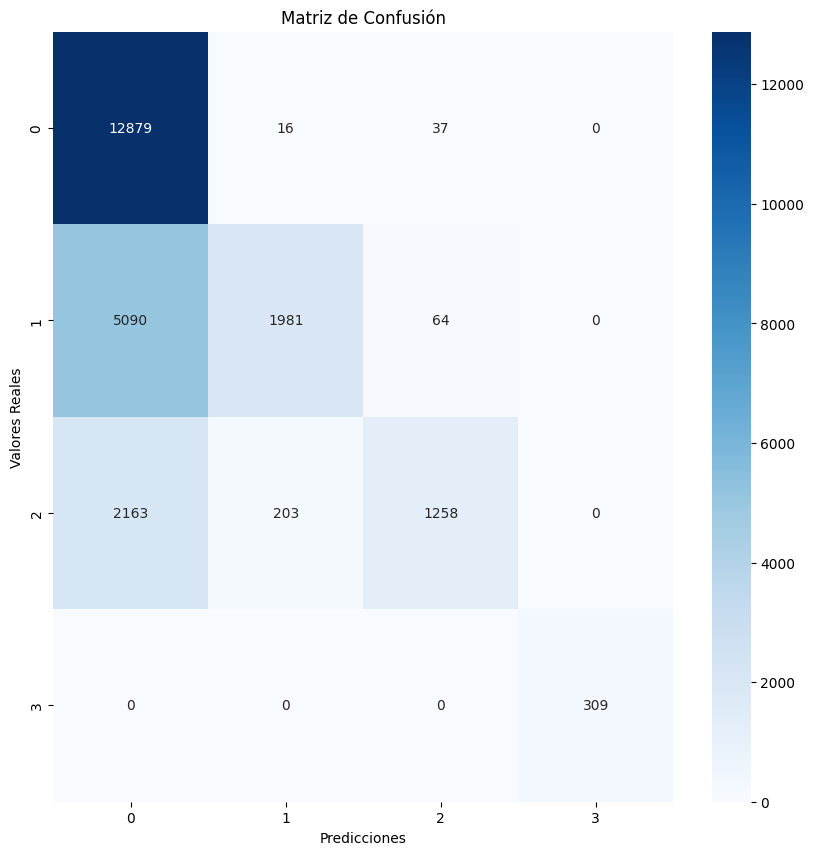

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [48]:
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

recall = TP / (TP + FN)

print("Recall: {:.2f}".format(recall))

Recall: 0.28


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
rnd_clf.fit(X_test, y_test)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_RFC = rnd_clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrixRFC = confusion_matrix(y_test, y_pred_RFC)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[12918    11     3     0]
 [   66  7059    10     0]
 [   10    31  3583     0]
 [    0     0     0   309]]


In [67]:
accuracyConf = accuracy_score(y_test, y_pred_RFC)
print("Precisión (Accuracy): {:.2f}%".format(accuracyConf*100))

Precisión (Accuracy): 99.45%
